In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def infect(k, SIR):
  prob = distribuicao()
  if prob < PC:
    if (k+1) % L == 0:
      ind = k+1-L
    else:
      ind = k+1
    if rede[ind//L][ind%L] == 0 and SIR[0] > 0:
      rede[ind//L][ind%L] = 1
      SIR[0] = SIR[0] - 1
      SIR[1] = SIR[1] + 1

  prob = distribuicao()
  if prob < PC:
    if k > (N-L-1):
      ind = k+L-N
    else:
      ind = k+L
    if rede[ind//L][ind%L] == 0 and SIR[0] > 0:
      rede[ind//L][ind%L] = 1
      SIR[0] = SIR[0] - 1
      SIR[1] = SIR[1] + 1

  prob = distribuicao()
  if prob < PC:
    if k % L == 0:
      ind = k+L-1
    else:
      ind = k-1
    if rede[ind//L][ind%L] == 0 and SIR[0] > 0:
      rede[ind//L][ind%L] = 1
      SIR[0] = SIR[0] - 1
      SIR[1] = SIR[1] + 1

  prob = distribuicao()
  if prob < PC:
    if k < L:
      ind = k+N-L
    else:
      ind = k-L
    if rede[ind//L][ind%L] == 0  and SIR[0] > 0:
      rede[ind//L][ind%L] = 1
      SIR[0] = SIR[0] - 1
      SIR[1] = SIR[1] + 1

  return SIR

def recuperate(k, SIR):
  prob = distribuicao()
  if prob < PR and SIR[1] > 0:
    rede[k//L][k%L] = -1
    SIR[1] = SIR[1] - 1
    SIR[2] = SIR[2] + 1
  return SIR

def status(N, rede):
  return rede[N//L][N%L]

def plotar(SIRs):
  Ss = [s[0] for s in SIRs]
  Is = [i[1] for i in SIRs]
  Rs = [r[2] for r in SIRs]
  Xs = [x for x in range(len(SIRs))]
  f, ax = plt.subplots(1, figsize=(10,8))
  ax.plot(Xs, Ss)
  ax.plot(Xs, Is)
  ax.plot(Xs, Rs)
  f.legend(['Suscetíveis','Infectados','Recuperados'], loc='center right')
  plt.title('Pc:' + str(PC) + ' Pr:' + str(PR))

def transpor(M):
  return list(map(list, zip(*M)))

In [ ]:
Probs = [(0.2, 0.2), (0.2, 0.5), (0.2, 0.8), (0.5, 0.2), (0.5, 0.5), (0.5, 0.8), (0.8, 0.2), (0.8, 0.5), (0.8, 0.8)]
L = 100
N = L ** 2
steps = 10
distribuicao = lambda : np.random.random()
palette = "YlGnBu"

rec = -1 # recuperado
suc = 0  # suscetivel
inf = 1  # infectado

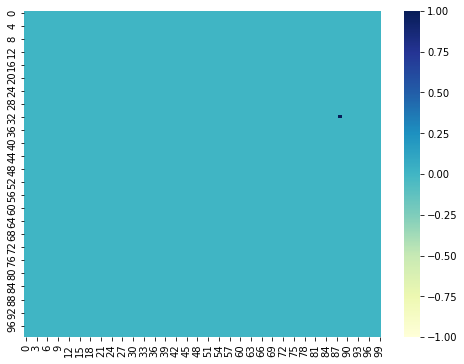

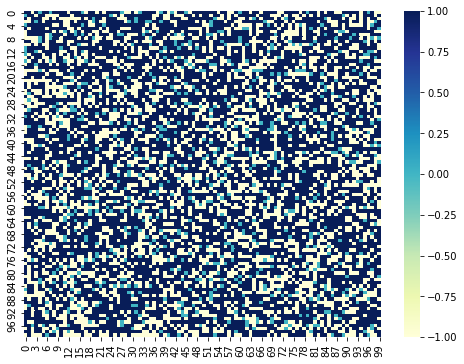

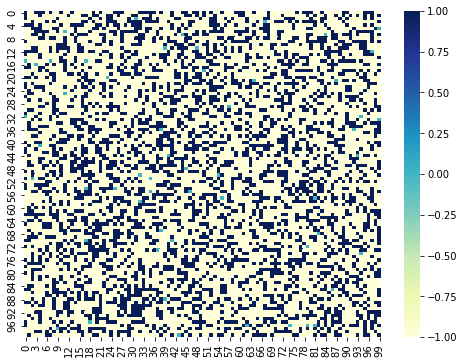

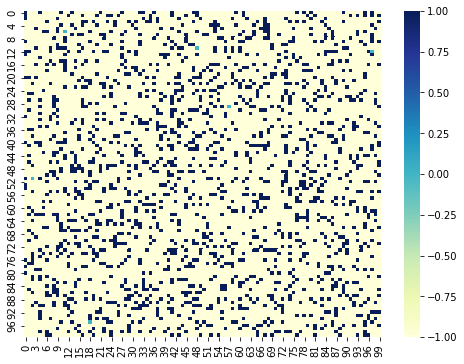

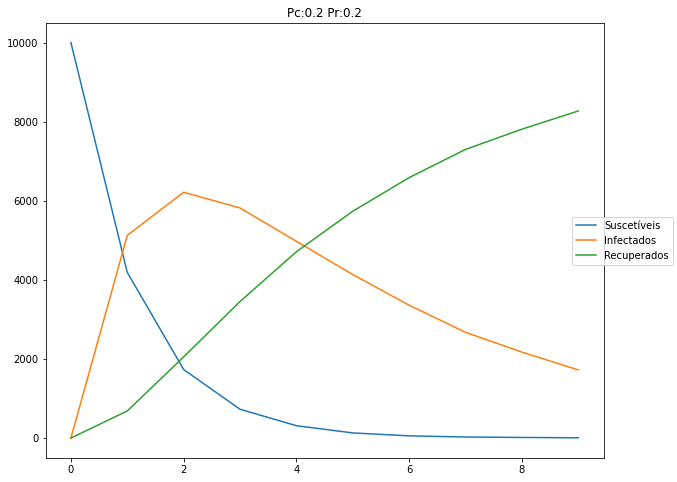

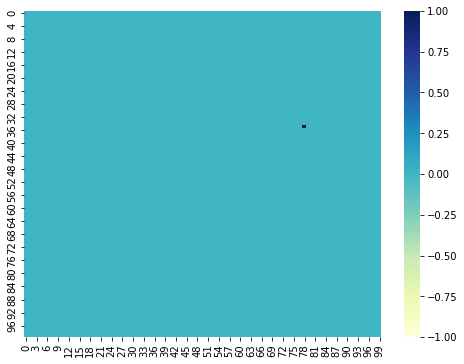

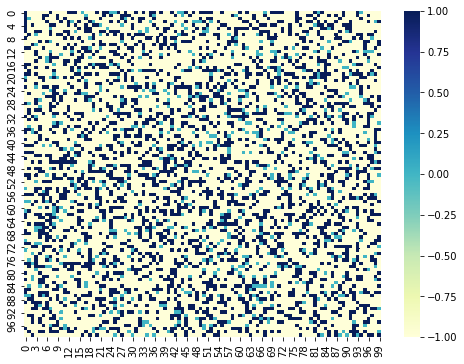

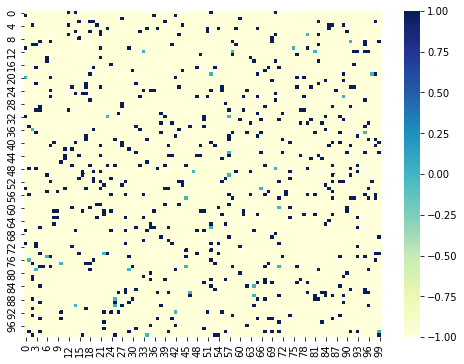

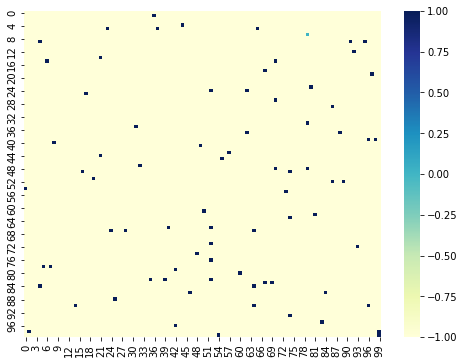

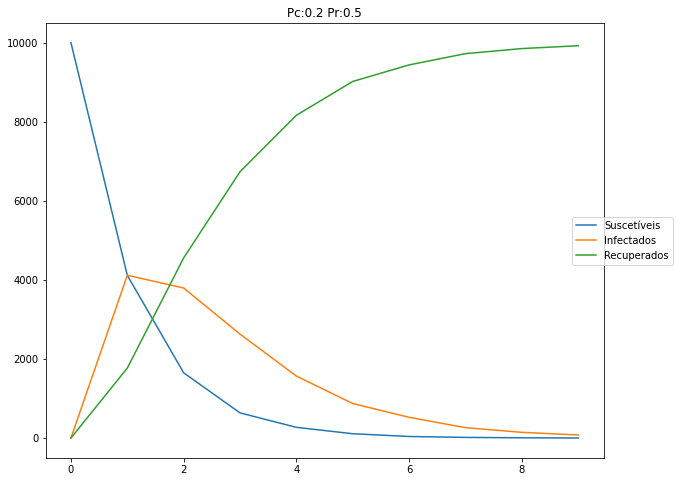

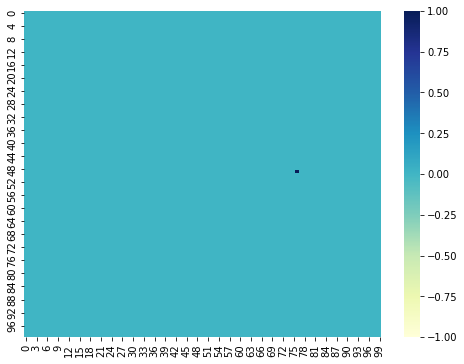

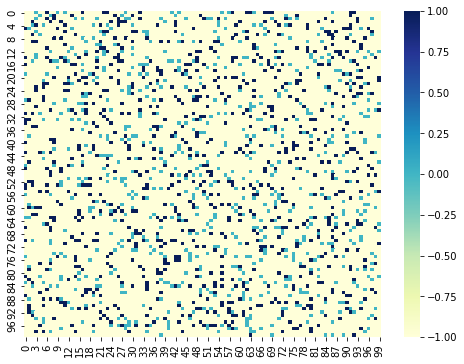

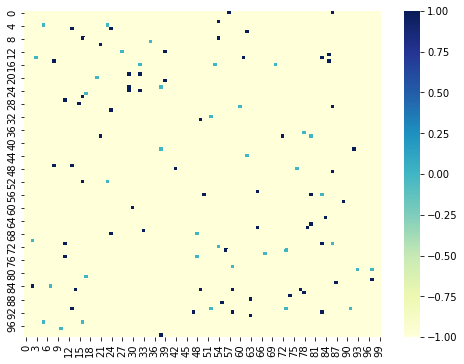

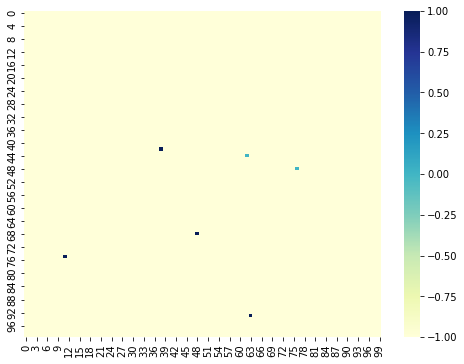

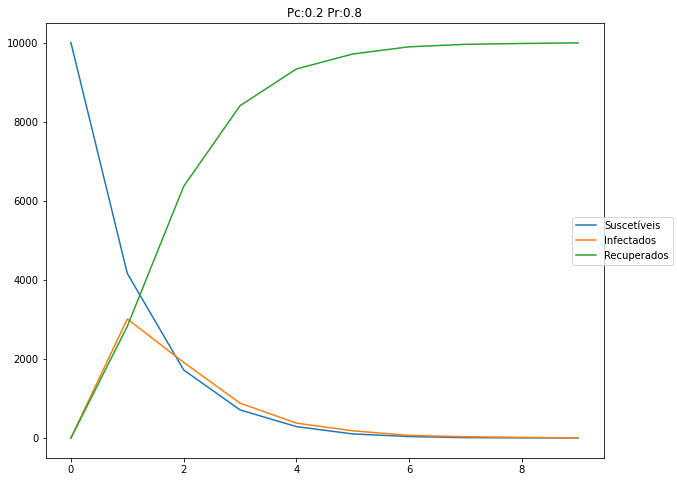

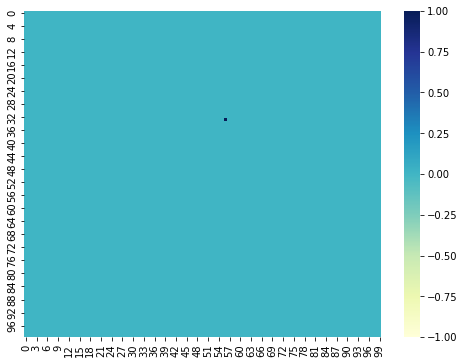

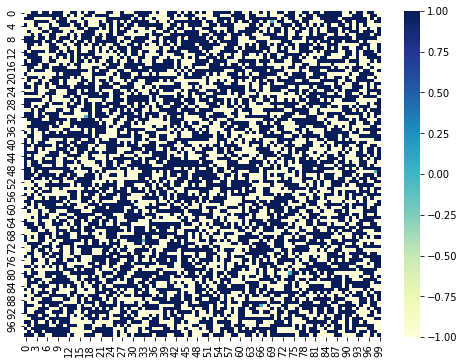

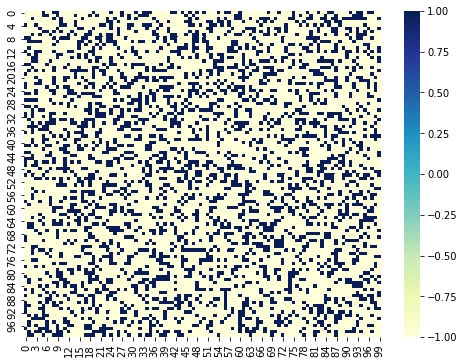

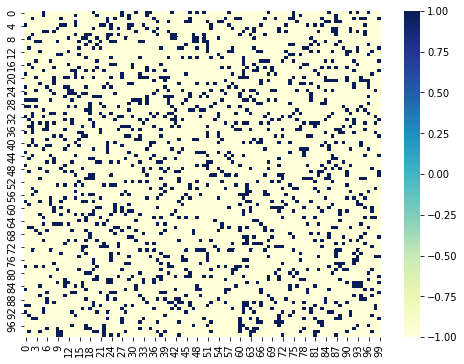

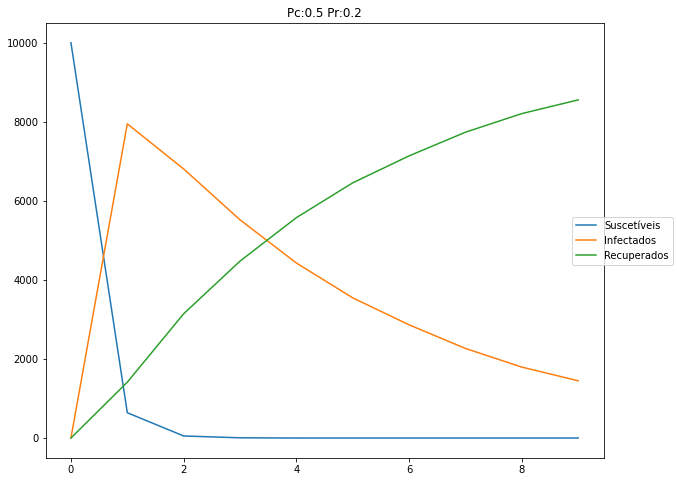

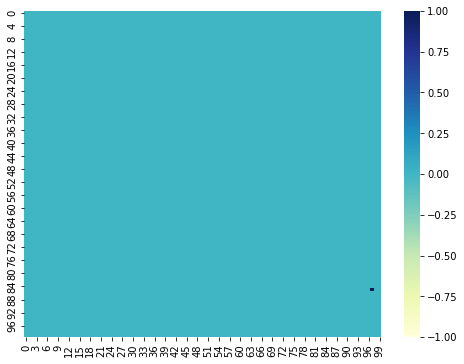

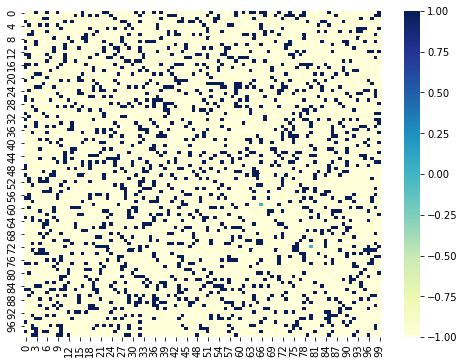

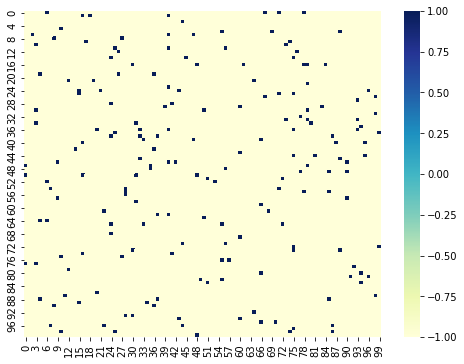

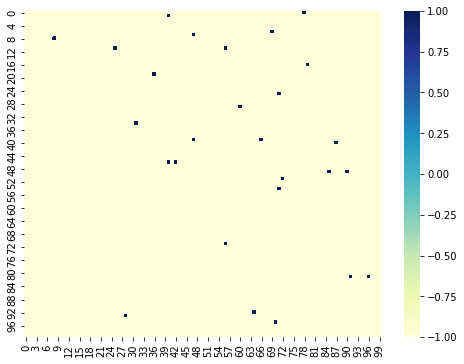

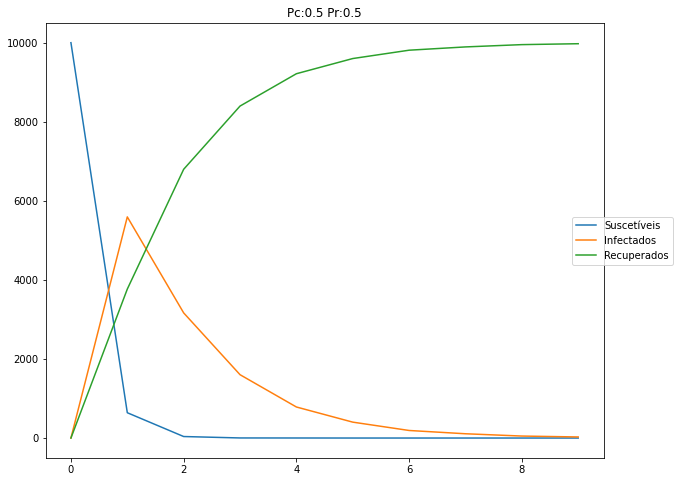

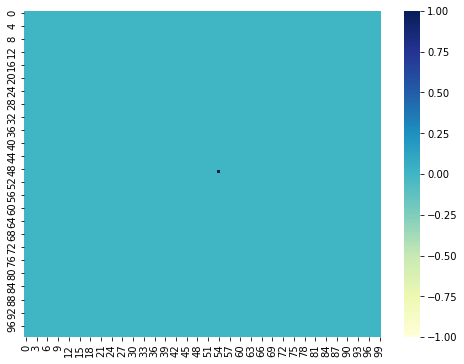

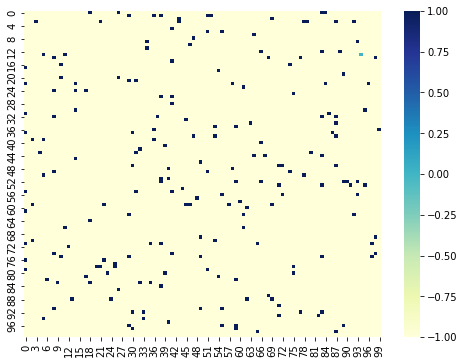

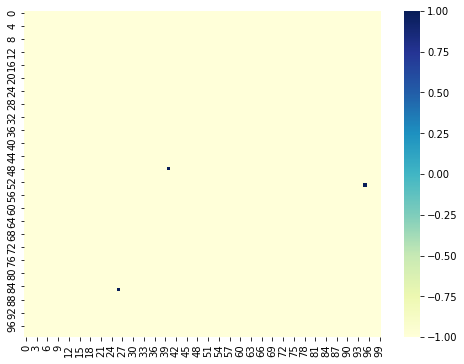

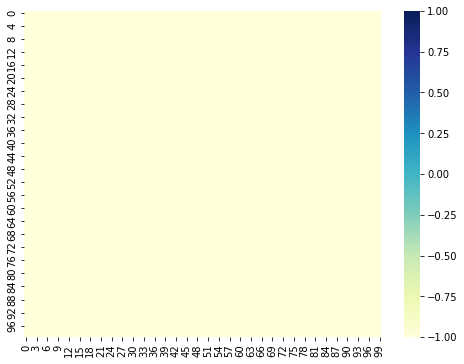

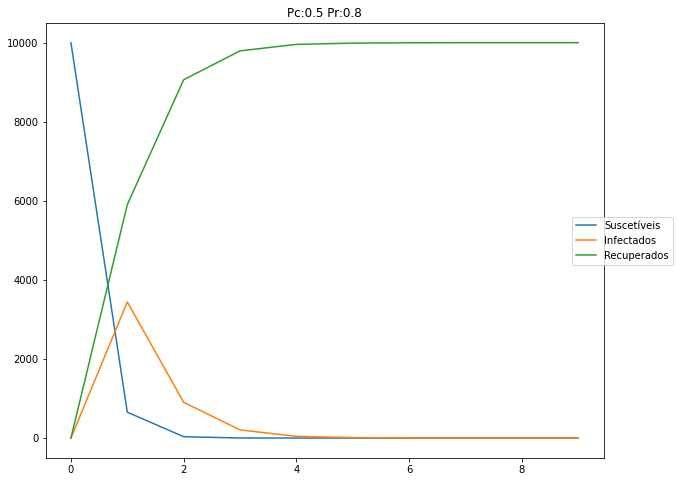

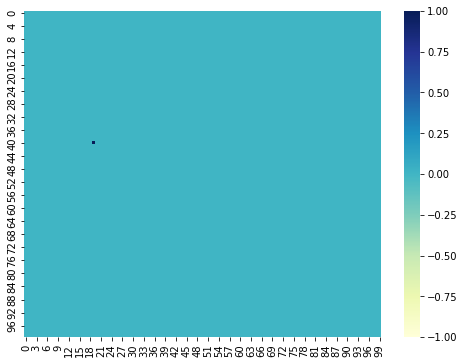

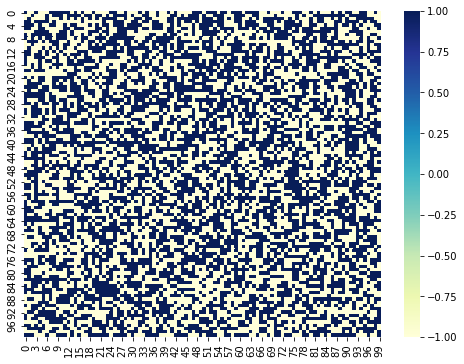

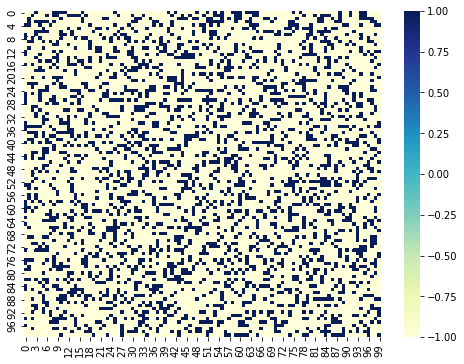

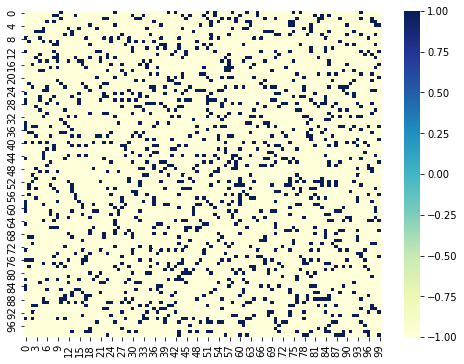

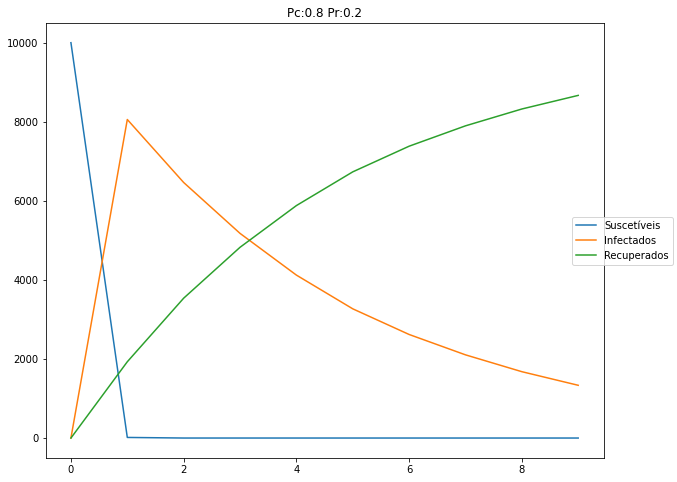

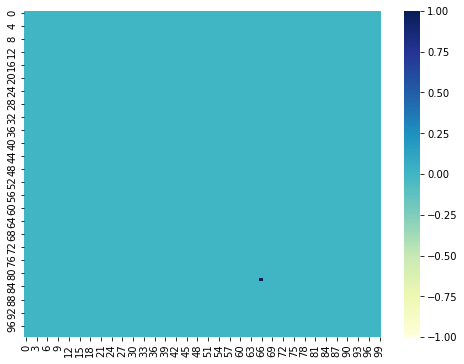

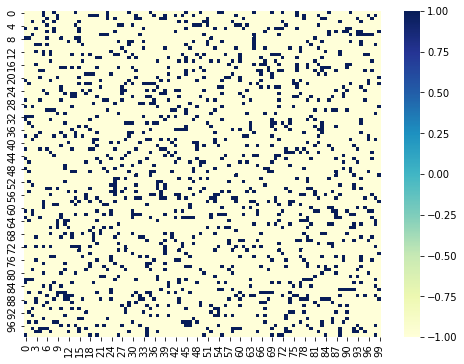

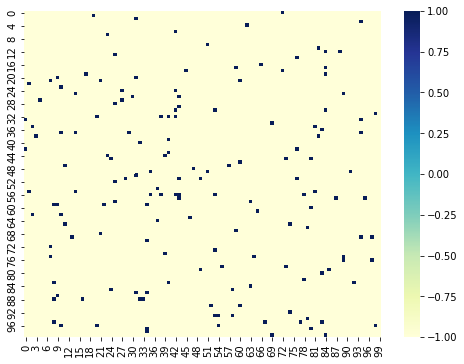

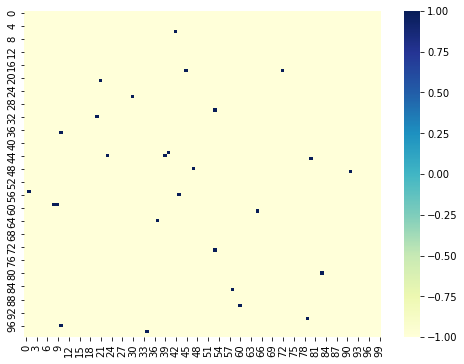

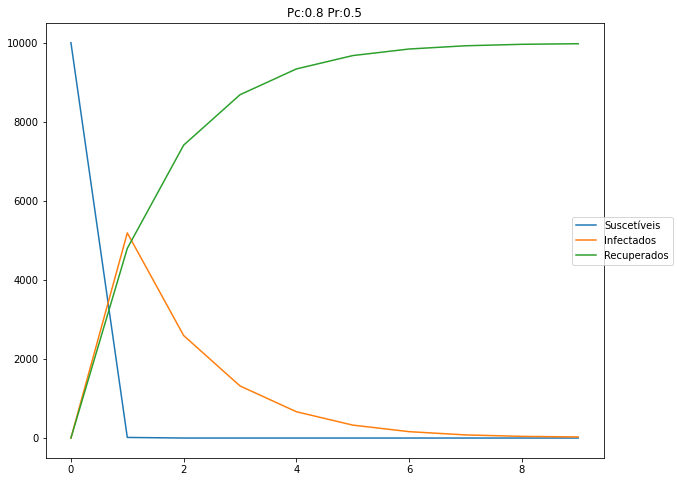

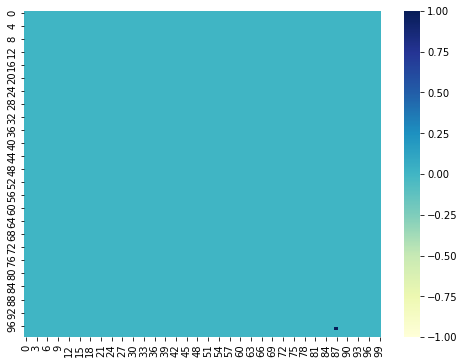

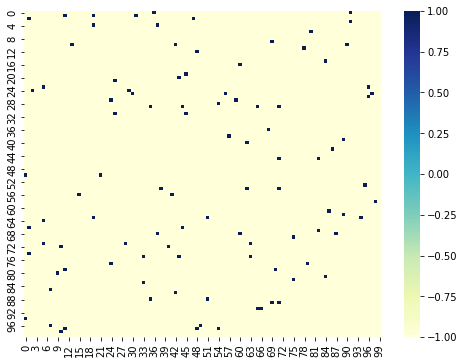

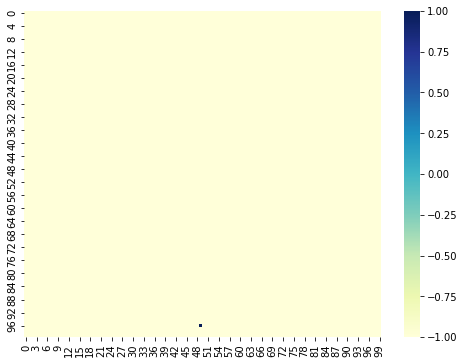

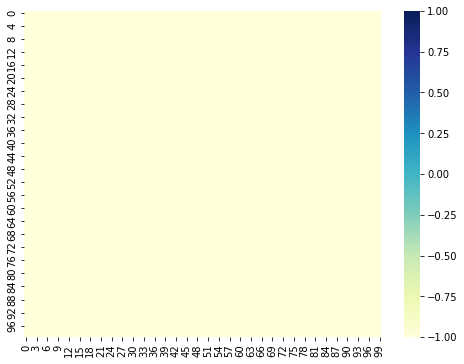

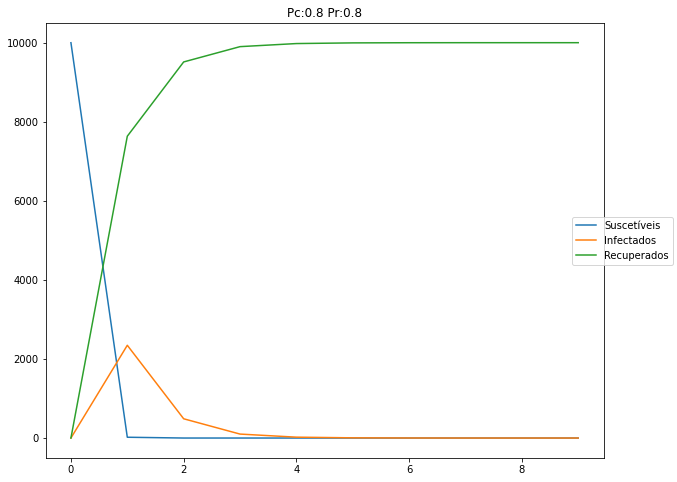

In [ ]:
for prob in Probs:
  PC, PR = prob
  rede = np.zeros((L,L))
  rand = np.random.randint(0,N)
  rede[rand//L][rand%L] = 1
  SIRs = []
  SIR = [N-1, 1, 0]
  for step in range(0,steps):
    SIRs.append(list(SIR))
    if step % 3 == 0:
      plt.figure(figsize=(8,6))
      sns.heatmap(rede, vmin=-1, vmax=1, cmap=palette)
      plt.show()
    for i in range(N):
      SIR = infect(i, SIR)
      if status(i, rede) == inf:
        SIR = recuperate(i, SIR)
  plotar(SIRs)

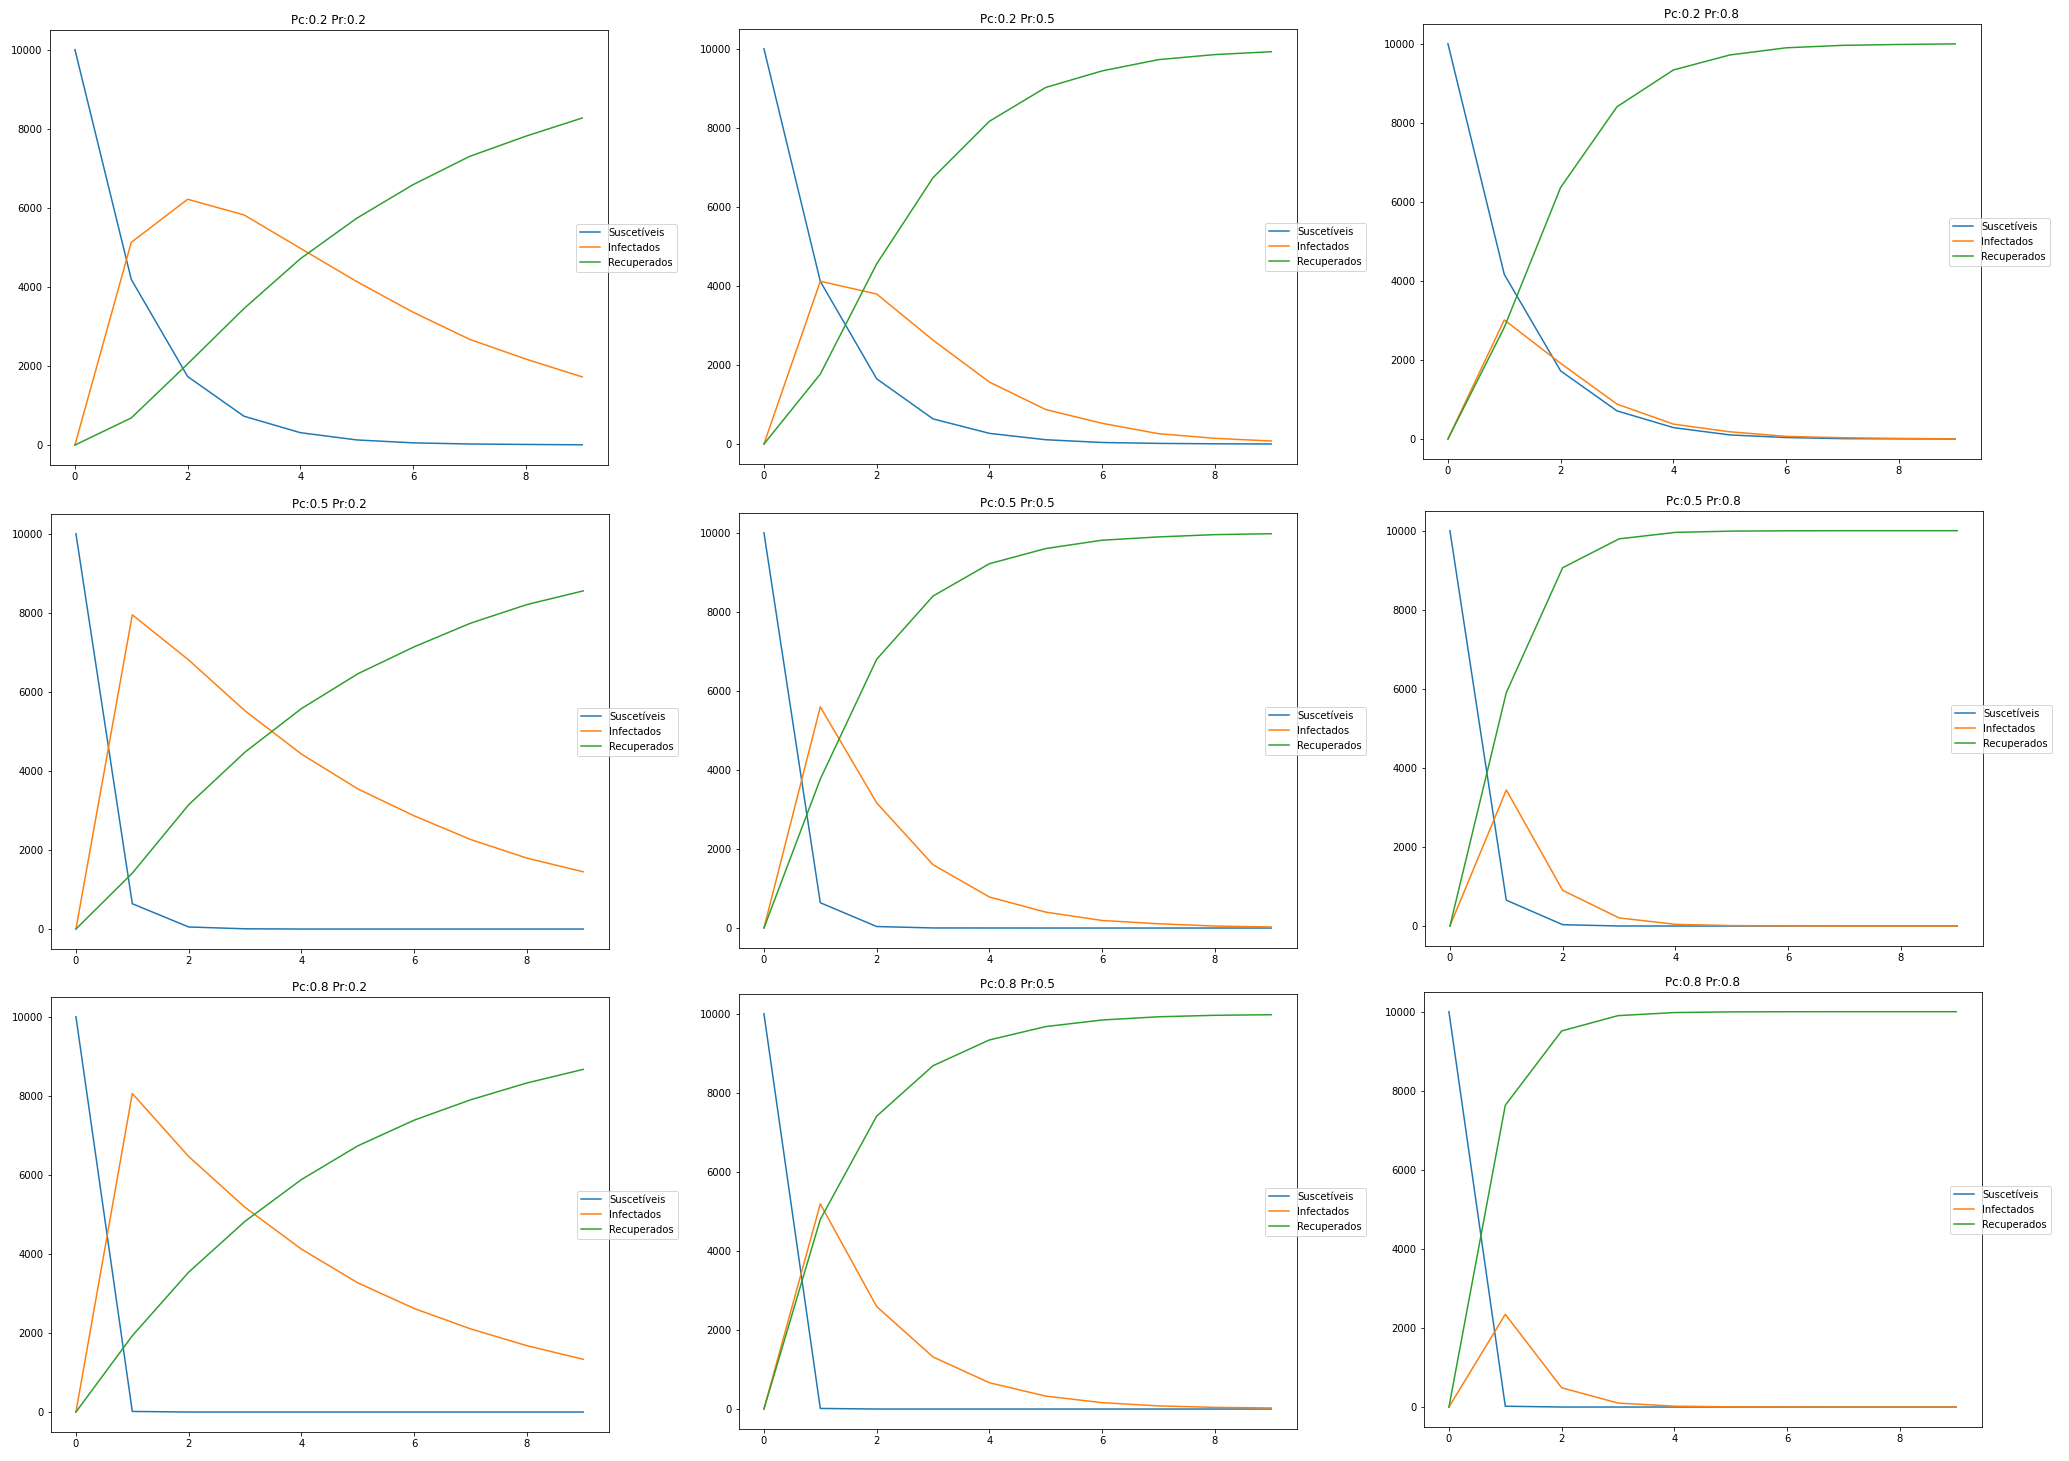

Todos os gráficos seguem o mesmo padrão do modelo SIR. Uma curva estritamente decrescente dos suscetíveis, uma estritamente crescente com crescimento mais lento dos recuperados, e a curva dos infectados, semelhante a uma distribuição de Maxwell-Boltzmann.

Comparando os gráficos, é possível perceber que a curva dos suscetíveis tem o mesmo comportamento para valores iguais de Pc, sendo praticamente idênticas para os valores utilizados.

Já as curvas de infectados e recuperados têm um comportamento parecido, porém não tão idêntico, para valores iguais de Pr.


*  Para Pr=0.2, os recuperados têm um crescimento bem lento e os infectados têm um crescimento bem superior, com um pico maior que 6000 que ocorre bem antes da interseção entre as duas curvas.
*  Para Pr=0.5, os picos caem para entre 4000 e 6000, além de que o crescimento das duas já se torna bem mais próximo, com a diferença diminuindo com o aumento de Pc.
*  Para Pr=0.8, a situação se inverte, sendo a quantidade de recuperados pelo menos igual à de infectados, com a diferença aumentando com o aumento da Pc.

Os mapas de calor mostram bem a evolução da doença para diferentes probabilidades de recuperação. Para Pr=0.2, há um crescimento inicial muito grande e a curva demora a cair, restando uma quantidade significativa no final, enquanto para Pr=0.8, o crescimento inicial é pequeno e a quantidade de infectados zera rapidamente.